<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Landbruk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving LE29Q03_201120.XLSX to LE29Q03_201120.XLSX


In [6]:
header = ['Kundenr','Orgnr','Postnr','Kode','Produkt','Forsikringsnr','Årspremie','NACE']
data = pd.read_excel('LE29Q03_201120.XLSX',names=header,skiprows=1)#, header=None,skiprows=1,names=navn)

#data_kjent = []; data_ukjent = []; data_inn = []; data_lek = []; 
#data_frost = []; data_til = [];
        
#for i in år[:-9]:
#    inn1 = inn.loc[inn['år']==i,'skade'].sum()
data

,Kundenr,Orgnr,Postnr,Kode,Produkt,Forsikringsnr,Årspremie,NACE
0,28800,937893833,4760,N16,HELSE,5250155,40261,64.190
1,28800,937893833,4760,N17,PERSONAL,4883438,111422,64.190
2,28800,937893833,4760,N20,YRKESSKADE,4883433,27970,64.190
3,28800,937893833,4760,N25,HUSEIER,2494676,18540,64.190
4,28800,937893833,4760,N70,BANKDRIFT,2494781,13671,64.190
...,...,...,...,...,...,...,...,...
67871,1271930,858996422,1900,N31,DROSJE,6612267,47272,0 .
67872,1271957,924650001,4824,N25,HUSEIER,6612148,16515,68.209
67873,1271978,925855294,6011,N33,NÆRINGSBIL,6612287,10821,0 .
67874,1272129,914926688,4737,N20,YRKESSKADE,6613129,11402,0 .


In [7]:
#data_kjent = []; data_ukjent = []; data_inn = []; data_lek = []; 
#data_frost = []; data_til = [];
        
#for i in år[:-9]:
#    inn1 = inn.loc[inn['år']==i,'skade'].sum()

#analyse, mange med master
#pris og produkt, bredree kompetanse med produkt, ressurs i forbindelse med klimarisiko 
#risk, aktuarfunksjon (underlagt risk, bruker konsulenter i dag). Være med å kontrollere irene (er S2 overholdt). 

In [8]:
test = data.loc[data['Kode']=='L21','Årspremie'].sum()

In [ ]:
data.loc[data['Kode']=='L21','NACE'].unique() #list all unique values

In [19]:
data.loc[data['Kode']=='L21','NACE'].value_counts() #count for each NACE


43.120    2090
0 .        681
01.410     522
41.200     482
01.110     478
          ... 
32.500       1
16232        1
80.200       1
46.381       1
00.          1
Name: NACE, Length: 330, dtype: int64

In [90]:
#kategoriene delt inn in 10 og 10 hele tall

a=data.loc[(data['Kode']=='L21')&(data['NACE'] == '0.')]#8000
b=data.loc[(data['Kode']=='L21')&(data['NACE'] >= '01.000')&(data['NACE'] <= '09.999')]#13 mill
c=data.loc[(data['Kode']=='L21')&(data['NACE'] >= '10.000')&(data['NACE'] <= '19.999')]#0
d=data.loc[(data['Kode']=='L21')&(data['NACE'] >= '20.000')&(data['NACE'] <= '29.999')]#0
e=data.loc[(data['Kode']=='L21')&(data['NACE'] >= '30.000')&(data['NACE'] <= '39.999')]#0
f=data.loc[(data['Kode']=='L21')&(data['NACE'] >= '40.000')&(data['NACE'] <= '49.999')]#0

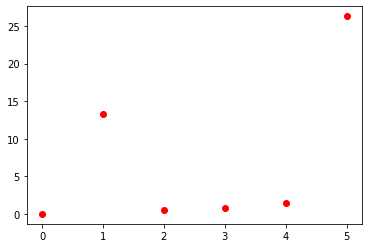

In [92]:
t = np.arange(0,5,1)
da = [a,b,c,d,e,f]
for i,j in enumerate(da):
  plt.plot(i,j['Årspremie'].sum()/(10**6),marker='o', color='r')


In [93]:
#De dyreste kategoriene

a=data.loc[(data['Kode']=='L21')&(data['NACE'] >= '01.000')&(data['NACE'] <= '03.999')]
b=data.loc[(data['Kode']=='L21')&(data['NACE'] >= '05.000')&(data['NACE'] <= '09.999')]
c=data.loc[(data['Kode']=='L21')&(data['NACE'] >= '41.000')&(data['NACE'] <= '43.999')]
d=data.loc[(data['Kode']=='L21')&(data['NACE'] >= '45.000')&(data['NACE'] <= '47.999')]

In [ ]:
'''
NACE-koder
#01-03: Jordbruk, skogbruk og fiske
#05-09: bergverksdrift og utvinning
#41-43:Bygge- og anleggsvirksomhet
#45-47: Varehandel med og reparasjon av motorvogner 
#48: landtransport og rørtransport 

#10-33:Industri
#
'''

In [144]:
#Farger
grønn = '#84BD00'
blå = '#60C3E6'
grå = '#6E6259'
blå1='#3396b9'
rød='#7f3035'
sjøgrønn='#004f59'

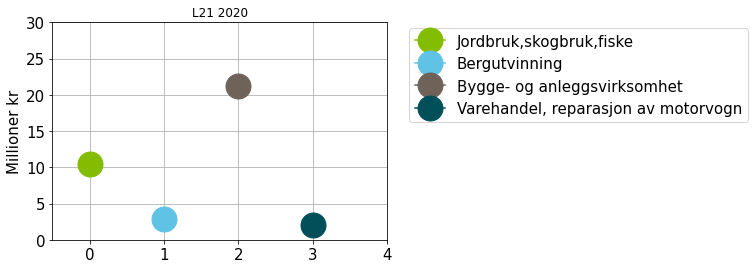

In [154]:
t = np.arange(0,5,1)
da = [a,b,c,d]; farger = [grønn,blå,grå,sjøgrønn]
tit = ['Jordbruk,skogbruk,fiske','Bergutvinning','Bygge- og anleggsvirksomhet',
       'Varehandel, reparasjon av motorvogn']
fig,ax = plt.subplots()
for i,j in enumerate(da):
  ax.plot(i,j['Årspremie'].sum()/(10**6),marker='o',color=farger[i],markersize=25,label=tit[i])
  ax.legend(bbox_to_anchor=(2.10, 1.01),prop={'size': 15})
  ax.set_ylabel('Millioner kr',fontsize=15)
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  ax.set_ylim(0,30); ax.set_xlim(-0.5,4)
  ax.set_title('L21 2020')
ax.grid()
  #plt.legend(handles=[p[i]], title='title', bbox_to_anchor=(1.05, 1), loc='upper left')


In [114]:
p